In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from sklearn import metrics
import tabulate
import itertools
import umap
from importlib import reload
from scipy import stats
import matplotlib.image as mpimg

# locals
import utils as ut
reload(ut)

sc.settings.verbosity = 3

In [2]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/SPT/"

adata = {}

for f in os.listdir(dirPath):
    
    if not f == "all":
        key = f
        mtxPath = f"{dirPath}{f}/outs/"
        data = sc.read_visium(mtxPath)
        data.var_names_make_unique()
        data.var_names = [x.upper() for x in data.var_names]
        adata[key] = data
    
adata.keys()

reading /nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/SPT/HFD14/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/cstansbu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading /nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/SPT/ND/outs/filtered_feature_bc_matrix.h5
 (0:00:00)
reading /nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/SPT/HFD8/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


dict_keys(['HFD14', 'ND', 'HFD8'])

# Filtering

In [3]:
keys = ['ND', 'HFD8', 'HFD14']

min_counts = 10

for key in keys:
    print(key)
    data = adata[key]
    sc.pp.filter_cells(data, min_counts=min_counts)
    sc.pp.normalize_total(data, target_sum=1e4) # Normalize each cell by total counts over all genes
    sc.pp.log1p(data) # Logarithmize data via `X = \log(X + 1)`,
    sc.pp.scale(data) # unit variance and zero mean


ND
filtered out 1 cells that have less than 10 counts
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
HFD8
filtered out 2 cells that have less than 10 counts
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
HFD14
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


ND


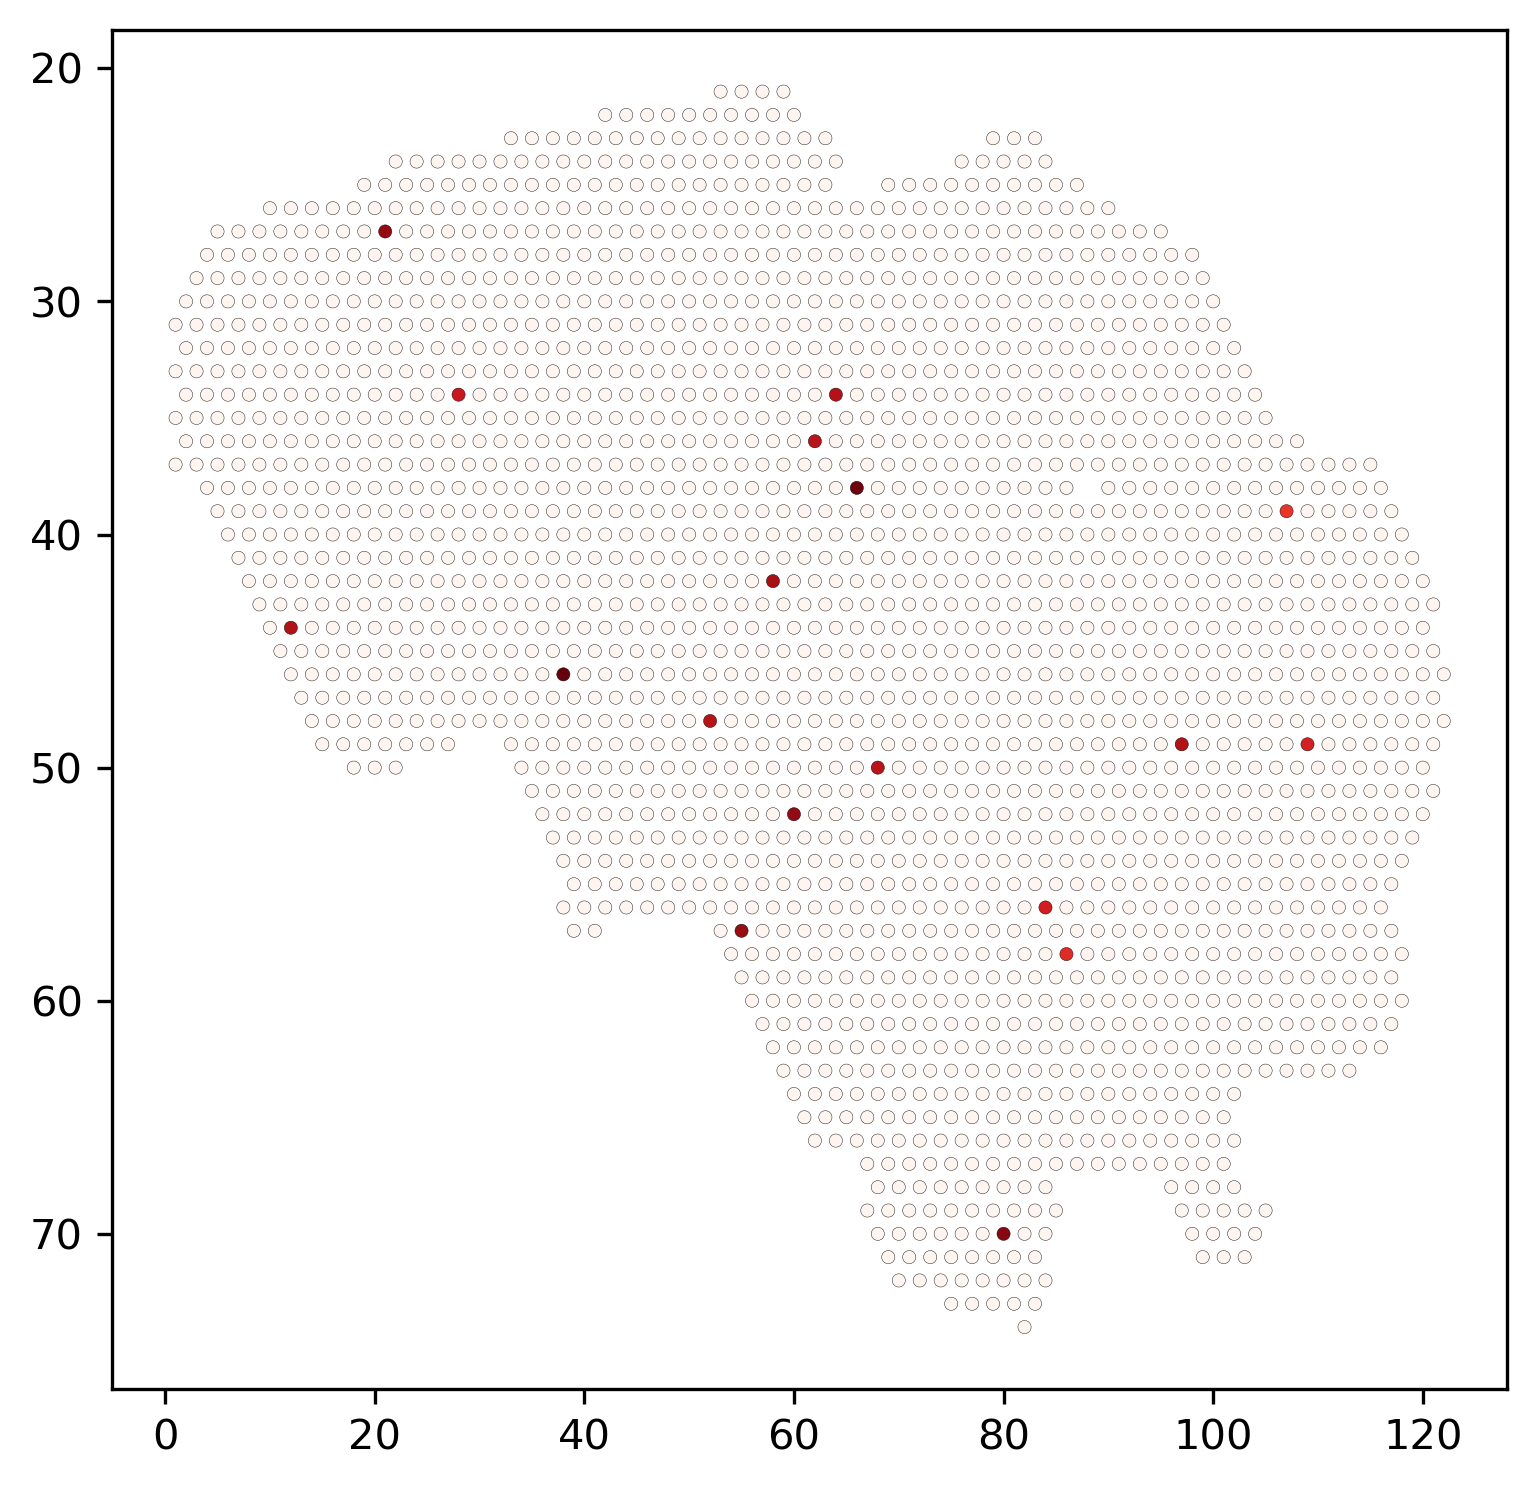

In [84]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 6

def getImage(data, image_key='hires'):
    """A function to get image from the spatial data """
    from scanpy.pl._tools import scatterplots as spt    
    sptData = data.uns['spatial']

    sampleName = list(sptData.keys())[0]
    
    img = sptData[sampleName]['images'][image_key]
    
    
    # img, img_key = spt._check_img(spatial_data, None, image_key)
    # print(img)
    return img
    
#     d = data.uns['spatial']
    
#     if sample is None:
#         sample = list(d.keys())[0]
        
        
    
#     print(d[sample].keys())
    
    
    

for key in keys:
    print(key)
    data = adata[key]
    
    img = getImage(data)
    
    df = data.to_df()
    
    plt.scatter(data.obs['array_col'], 
                data.obs['array_row'],
                c=df['SOX17'],
                marker=".",
                edgecolor="k",
                lw=0.1,
                cmap='Reds',
                zorder=2,
                s=40)
    
    ax = plt.gca()
    ax.invert_yaxis()
    
    ylim = ax.get_ylim()
    xlim = ax.get_ylim()
    
    extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
    
    # plt.imshow(img, 
    #            interpolation='none', 
    #            extent=extent,
    #            zorder=1)
    
#     plt.show()
    
    # axList = sc.pl.spatial(data, show=False, color=['in_tissue'])
    # ax = axList[0]
    # d = ax.collections[0]
    # print(d)
    
    
    
    
    
    break

In [56]:
dir(sc.pl._tools.scatterplots)

['AnnData',
 'Any',
 'Axes',
 'Collection',
 'ColorLike',
 'Colormap',
 'Cycler',
 'Empty',
 'Figure',
 'Integral',
 'List',
 'Literal',
 'Mapping',
 'Normalize',
 'Optional',
 'Sequence',
 'Tuple',
 'Union',
 'VBound',
 '_FontSize',
 '_FontWeight',
 '_IGraphLayout',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_categorical_legend',
 '_basis2name',
 '_broadcast_args',
 '_check_crop_coord',
 '_check_img',
 '_check_na_color',
 '_check_scale_factor',
 '_check_spatial_data',
 '_check_spot_size',
 '_color_vector',
 '_components_to_dimensions',
 '_doc_params',
 '_empty',
 '_get_basis',
 '_get_color_source_vector',
 '_get_palette',
 '_get_vboundnorm',
 '_panel_grid',
 '_utils',
 '_wraps_plot_scatter',
 'cabc',
 'check_colornorm',
 'check_projection',
 'circles',
 'colors',
 'combinations',
 'copy',
 'diffmap',
 'doc_adata_color_etc',
 'doc_edges_arrows',
 'doc_scatter_embedding',
 'doc_scatter_spatial',
 'doc_show_save